In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy import io
from sklearn import svm
from sklearn.model_selection import cross_val_score

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

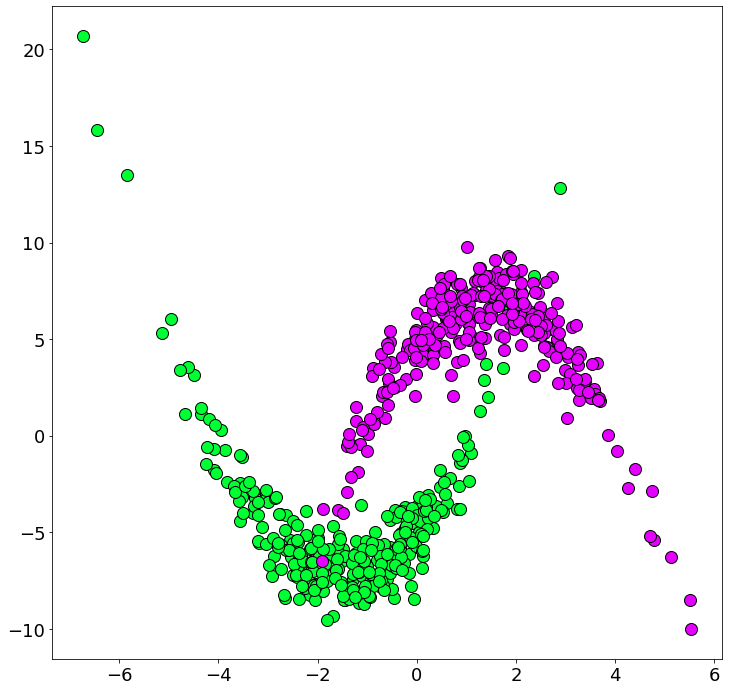

In [2]:
# Random ellipse 1

n1 = 300  # Training set size

x1 = 1.5 * np.random.randn(n1) - 1.5
y1 = 1.2 * np.random.randn(n1) + np.power(x1 + 1.5, 2) - 7
x2 = 1.5 * np.random.randn(n1) + 1.5
y2 = 1.2 * np.random.randn(n1) - np.power(x2 - 1.5, 2) + 7

plt.plot(x1, y1, 'ro', mfc=(0, 1, 0.2), mec='k', ms=12)
plt.plot(x2, y2, 'bo', mfc=(0.9, 0, 1), mec='k', ms=12)

plt.show()

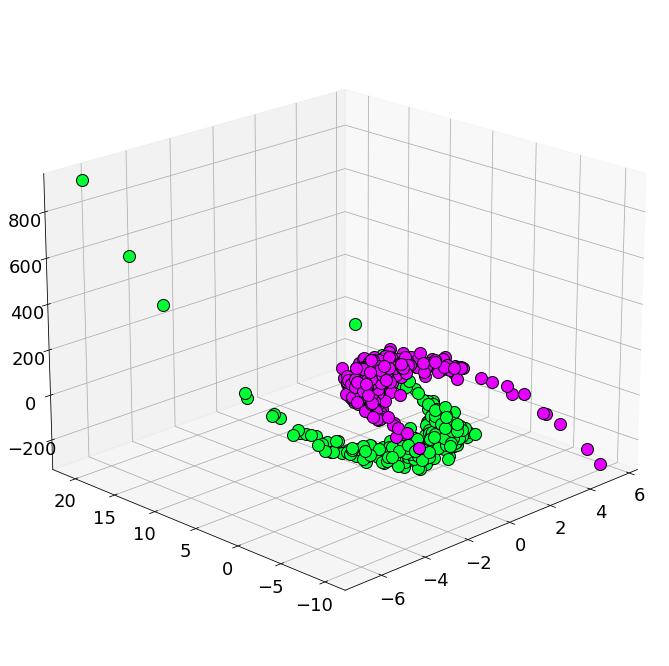

In [3]:
z1 = np.power(x1, 2) * y1
z2 = np.power(x2, 2) * y2

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x1, y1, z1, 'ro', mfc=(0, 1, 0.2), mec='k', ms=12)
ax.plot(x2, y2, z2, 'bo', mfc=(0.9, 0, 1), mec='k', ms=12)

ax.view_init(20, -135)

plt.show()

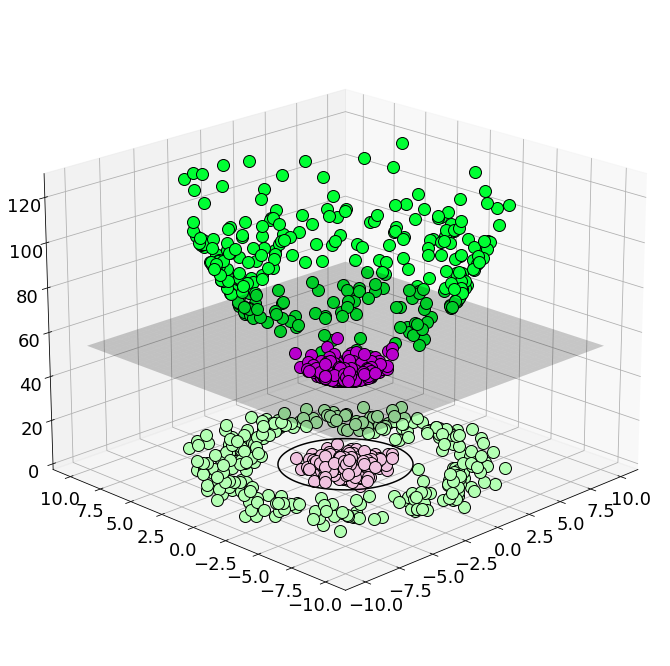

In [4]:
r = 7 + np.random.randn(n1)
th = 2 * np.pi * np.random.randn(n1)
xr = r * np.cos(th)
yr = r * np.sin(th)
x5 = np.random.randn(n1)
y5 = np.random.randn(n1)

zr = np.power(xr, 2) + np.power(yr, 2)
z5 = np.power(x5, 2) + np.power(y5, 2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, -135)

ax.plot(xr, yr, zr + 40, 'ro', mfc=(0, 1, 0.2), mec='k', ms=12)
ax.plot(x5, y5, z5 + 40, 'bo', mfc=(0.9, 0, 1), mec='k', ms=12)

x = np.arange(-10, 10.5, 0.5)
y = x
X, Y = np.meshgrid(x, y)
F3 = 54 + 0 * X + 0 * Y

ax.plot_surface(X, Y, F3, cmap='gray', linewidth=0, antialiased=True, alpha=0.2)

ax.plot(xr, yr, np.zeros(*xr.shape), 'ro', mfc=(179 / 255, 1, 179 / 255), mec='k', ms=12)
ax.plot(x5, y5, np.zeros(*x5.shape), 'bo', mfc=(240 / 255, 194 / 255, 224 / 255),  mec='k', ms=12)

theta = np.linspace(0, 2 * np.pi, 100)
xrr = np.sqrt(14) * np.cos(theta)
yrr = np.sqrt(14) * np.sin(theta)

ax.plot(xrr, yrr, np.zeros(*xrr.shape), 'k-')

plt.show()

In [5]:
# Classify dogs vs. cats
dogdata_w_mat = io.loadmat(os.path.join('..', 'datasets', 'dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..', 'datasets', 'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave, cat_wave), axis=1)

u, s, vT = np.linalg.svd(CD - np.mean(CD), full_matrices=0)
v = vT.T

In [7]:
features = np.arange(1, 21)
xtrain = np.concatenate((v[:60, features], v[80:140, features]))
test = np.concatenate((v[60:80, features], v[140:160, features]))

label = np.repeat(np.array([1, -1]), 60)
truth = np.repeat(np.array([1, -1]), 20)

Mdl = svm.SVC(kernel='rbf', gamma='auto').fit(xtrain, label)
test_labels = Mdl.predict(test)

CMdl = cross_val_score(Mdl, xtrain, label, cv=10)  #cross-validate the model
classLoss = 1 - np.mean(CMdl)  # average error over all cross-validation iterations